<a href="https://colab.research.google.com/github/yxrellx/Biblioteca/blob/colaborati/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/elinar.csv')
df

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,quimio_terapia(2),radio_terapia(2)
0,2,43,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1,Positve,...,1,0,0,0,1,1,0,0.000276,SI,SI
1,8,76,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1,Positve,...,0,2,0,1,1,1,1,0.002373,No,SI
2,10,78,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,3,1,0,1,1,1,0.003653,SI,SI
3,28,86,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1,Positve,...,0,2,0,0,0,1,2,0.000916,SI,SI
4,35,84,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,Her2,1,Negative,...,0,1,1,0,0,1,1,0.001644,SI,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,7278,67,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,1,1,0,1,5,2,0.012834,SI,No
1512,7280,63,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,3,1,0,1,4,0,0.023726,SI,No
1513,7284,61,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,4,Positve,...,0,10,0,0,0,5,2,0.012834,SI,No
1514,7286,66,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4,Positve,...,0,1,1,0,0,4,2,0.036559,SI,No


In [4]:
df =df.drop(['patient_id','type_of_breast_surgery','cancer_type','cancer_type_detailed',"cellularity","pam50_+_claudin-low_subtype","er_status_measured_by_ihc","er_status", "her2_status_measured_by_snp6", "her2_status", "tumor_other_histologic_subtype", "inferred_menopausal_state","integrative_cluster", "primary_tumor_laterality","oncotree_code","pr_status","3-gene_classifier_subtype", "death_from_cancer","quimio_terapia(2)", "radio_terapia(2)"],axis=1)
df

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,...,her2_status (2),tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area
0,43,0,1,3,1,0,2,0.000065,8.466155e-01,1,...,0,0,1,0,0,0,1,1,0,0.000276
1,76,1,1,3,1,8,2,0.000099,4.138046e-01,0,...,0,1,0,2,0,1,1,1,1,0.002373
2,78,0,1,3,1,0,4,0.006730,7.802601e-09,0,...,0,0,0,3,1,0,1,1,1,0.003653
3,86,0,1,3,1,1,5,0.008339,3.657886e-01,0,...,0,0,0,2,0,0,0,1,2,0.000916
4,84,0,1,2,0,0,1,0.005066,3.627876e-01,0,...,0,2,0,1,1,0,0,1,1,0.001644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,0,...,0,0,0,1,1,0,1,5,2,0.012834
1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,1,...,0,0,0,3,1,0,1,4,0,0.023726
1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,0,...,0,0,0,10,0,0,0,5,2,0.012834
1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,0,...,0,0,0,1,1,0,0,4,2,0.036559


In [5]:
features = df.values

In [6]:
from sklearn.cluster import KMeans
common_params = {
    "n_init": "auto",
    "random_state": 2,
}
modelo = KMeans(n_clusters=10, **common_params)
y_pred = modelo.fit_predict(features)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features)
reduced_cluster_centers = pca.transform(modelo.cluster_centers_)
y_pred = modelo.predict(features)

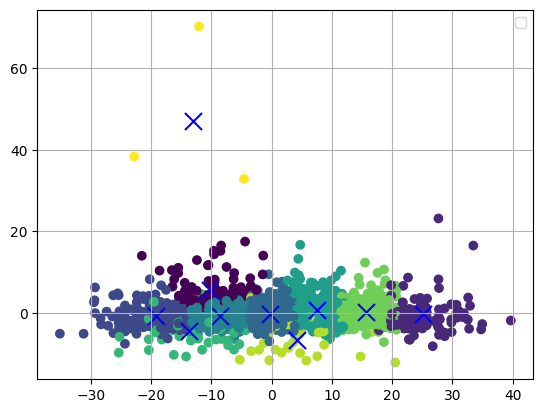

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=y_pred)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
ax.grid(True)
ax.legend()
plt.show()

In [21]:
type(y_pred)

numpy.ndarray

In [22]:
len(y_pred)

304

In [23]:
df.reset_index(inplace=True, drop=False)

In [24]:
ndf = df.copy()
ndf = pd.concat([ndf, pd.DataFrame(y_pred)], axis=1)
ndf

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,0
0,0,43,0,1,3,1,0,2,0.000065,8.466155e-01,...,0,1,0,0,0,1,1,0,0.000276,0.0
1,1,76,1,1,3,1,8,2,0.000099,4.138046e-01,...,1,0,2,0,1,1,1,1,0.002373,0.0
2,2,78,0,1,3,1,0,4,0.006730,7.802601e-09,...,0,0,3,1,0,1,1,1,0.003653,2.0
3,3,86,0,1,3,1,1,5,0.008339,3.657886e-01,...,0,0,2,0,0,0,1,2,0.000916,0.0
4,4,84,0,1,2,0,0,1,0.005066,3.627876e-01,...,2,0,1,1,0,0,1,1,0.001644,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,...,0,0,1,1,0,1,5,2,0.012834,NaN
1512,1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,...,0,0,3,1,0,1,4,0,0.023726,NaN
1513,1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,...,0,0,10,0,0,0,5,2,0.012834,NaN
1514,1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,...,0,0,1,1,0,0,4,2,0.036559,NaN


In [25]:
ndf.rename(columns={0:"Cluster"},inplace=True)
ndf

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
0,0,43,0,1,3,1,0,2,0.000065,8.466155e-01,...,0,1,0,0,0,1,1,0,0.000276,0.0
1,1,76,1,1,3,1,8,2,0.000099,4.138046e-01,...,1,0,2,0,1,1,1,1,0.002373,0.0
2,2,78,0,1,3,1,0,4,0.006730,7.802601e-09,...,0,0,3,1,0,1,1,1,0.003653,2.0
3,3,86,0,1,3,1,1,5,0.008339,3.657886e-01,...,0,0,2,0,0,0,1,2,0.000916,0.0
4,4,84,0,1,2,0,0,1,0.005066,3.627876e-01,...,2,0,1,1,0,0,1,1,0.001644,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1511,67,0,4,2,1,1,3,0.000065,2.410804e-08,...,0,0,1,1,0,1,5,2,0.012834,NaN
1512,1512,63,0,4,2,1,6,6,0.000083,1.955985e-01,...,0,0,3,1,0,1,4,0,0.023726,NaN
1513,1513,61,0,4,3,1,1,5,0.000082,2.030677e-08,...,0,0,10,0,0,0,5,2,0.012834,NaN
1514,1514,66,0,4,3,1,3,2,0.000082,1.586862e-01,...,0,0,1,1,0,0,4,2,0.036559,NaN


In [26]:
ndf[ndf["Cluster"]==0]

,index,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,tumor_other_histologic_subtype (2),inferred_menopausal_state (2),integrative_cluster (2),primary_tumor_laterality (2),oncotree_code (2),pr_status (2),3-gene_classifier_subtype (2),death_from_cancer (2),tumor_area,Cluster
0,0,43,0,1,3,1,0,2,0.000065,8.466155e-01,...,0,1,0,0,0,1,1,0,0.000276,0.0
1,1,76,1,1,3,1,8,2,0.000099,4.138046e-01,...,1,0,2,0,1,1,1,1,0.002373,0.0
3,3,86,0,1,3,1,1,5,0.008339,3.657886e-01,...,0,0,2,0,0,0,1,2,0.000916,0.0
7,7,45,1,1,3,1,0,3,0.006707,1.409136e-01,...,0,1,7,0,0,1,1,0,0.001341,0.0
8,8,61,0,1,2,1,1,2,0.006684,1.574858e-01,...,0,0,3,1,0,1,1,0,0.000916,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,39,1,1,3,1,5,4,0.010023,4.861620e-09,...,0,1,8,1,0,1,4,1,0.001341,0.0
294,294,74,1,1,3,1,1,3,0.008461,7.935979e-01,...,0,0,6,1,0,1,5,2,0.004651,0.0
295,295,60,0,1,2,0,1,4,0.000065,1.323775e-01,...,0,0,6,1,0,0,4,1,0.000385,0.0
297,297,47,1,1,3,1,0,3,0.000065,1.618206e-01,...,0,1,3,1,0,1,4,0,0.001462,0.0
